# **Custom metric evaluation**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

import plots
import constants

## **Constants**

In [2]:
METRIC_EVALUATION_FOLDER = constants.METRIC_EVALUATION_FOLDER
DEFAULT_PARAMS_MODEL_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'marian_transformer.csv')
MARIAN_RNN_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'marian_RNN.csv')
LAST_MODELS_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'last_results.csv')

In [3]:
dataset_transformer = pd.read_csv(DEFAULT_PARAMS_MODEL_RESULTS)
dataset_transformer.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
37,2023-06-20 19:31:35.051751,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.287168,180,{'train-sets': ['/docker/home/marianmt/artifac...
38,2023-06-20 19:36:22.178937,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,2.322370,190,{'train-sets': ['/docker/home/marianmt/artifac...
39,2023-06-20 19:36:22.178937,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.287168,190,{'train-sets': ['/docker/home/marianmt/artifac...
40,2023-06-20 19:41:09.727471,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,2.322370,200,{'train-sets': ['/docker/home/marianmt/artifac...
41,2023-06-20 19:41:09.727471,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.287168,200,{'train-sets': ['/docker/home/marianmt/artifac...


In [4]:
dataset_RNN = pd.read_csv(MARIAN_RNN_RESULTS)
dataset_RNN.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
35,2023-06-21 00:24:07.249696,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,33.477221,180,{'train-sets': ['/docker/home/marianmt/artifac...
36,2023-06-21 00:28:45.631677,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,10.724083,190,{'train-sets': ['/docker/home/marianmt/artifac...
37,2023-06-21 00:28:45.631677,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,33.477221,190,{'train-sets': ['/docker/home/marianmt/artifac...
38,2023-06-21 00:33:23.857982,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,10.724083,200,{'train-sets': ['/docker/home/marianmt/artifac...
39,2023-06-21 00:33:23.857982,gn_es_scored_june.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,33.477221,200,{'train-sets': ['/docker/home/marianmt/artifac...


In [5]:
def plot_metrics(df, title, column, ax):
    sns.lineplot(data=df, x="epoch", y=column, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(title)

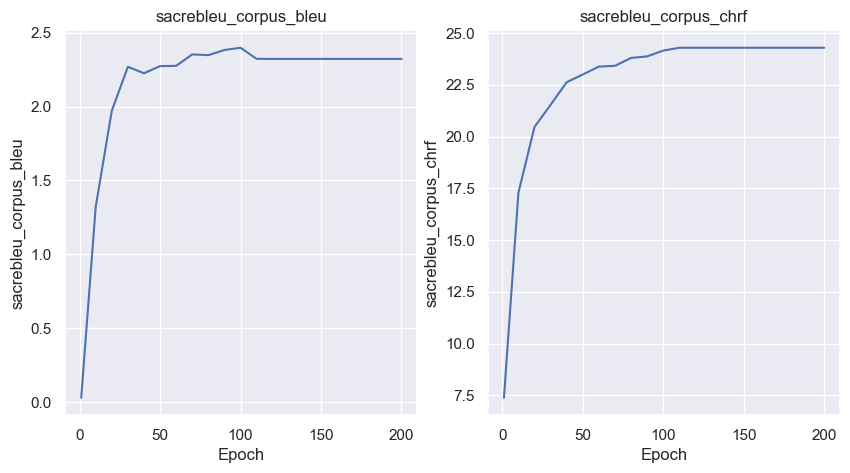

Maximum sacrebleu_corpus_bleu score: 2.3976187103216398
Maximum sacrebleu_corpus_chrf score: 24.287167745877383


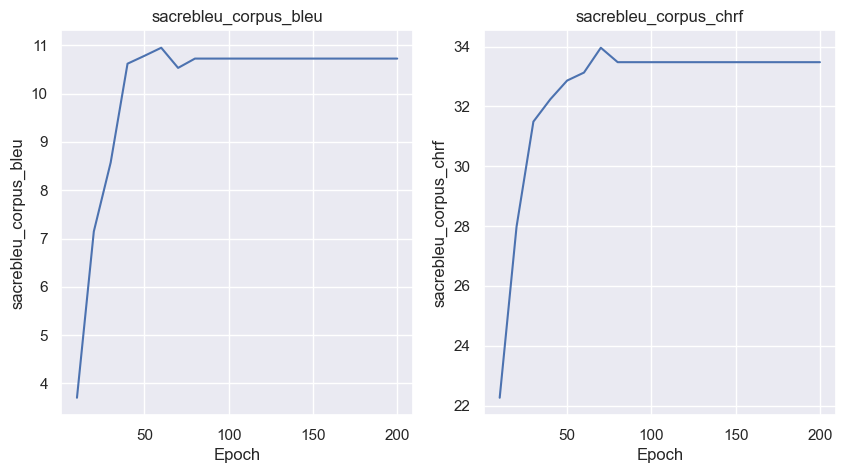

Maximum sacrebleu_corpus_bleu score: 10.948306278543276
Maximum sacrebleu_corpus_chrf score: 33.95939658753564


In [6]:
for dataset in [dataset_transformer, dataset_RNN]:
    score_types = dataset['score_type'].unique()
    sns.set_theme(style="darkgrid")
    fig, ax = plt.subplots(1, len(score_types), figsize=(10, 5))
    for idx, metric in enumerate(score_types):
        plot_metrics(
            dataset[dataset['score_type'] == metric],
            metric,
            'score',
            ax[idx],
        )
    plt.show(block=False)

    for idx, metric in enumerate(score_types):
        print(f'Maximum {metric} score: ', end='')
        print(max(dataset[dataset['score_type'] == metric]['score']))

## **Latest results**

In [7]:
results_df = plots.create_df_from_results_csv(LAST_MODELS_RESULTS)

In [8]:
results_df.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
731,2023-07-03 22:19:28.622921,gn_es_test_grid_july_type_multi-s2s.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,10.221225,2,{'train-sets': ['/docker/home/marianmt/artifac...
732,2023-07-03 22:22:24.405090,gn_es_test_grid_july_type_transformer.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,0.733169,1,{'train-sets': ['/docker/home/marianmt/artifac...
733,2023-07-03 22:22:24.405090,gn_es_test_grid_july_type_transformer.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,11.843066,1,{'train-sets': ['/docker/home/marianmt/artifac...
734,2023-07-03 22:25:15.751304,gn_es_test_grid_july_type_transformer.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,1.710033,2,{'train-sets': ['/docker/home/marianmt/artifac...
735,2023-07-03 22:25:15.751304,gn_es_test_grid_july_type_transformer.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,16.922145,2,{'train-sets': ['/docker/home/marianmt/artifac...


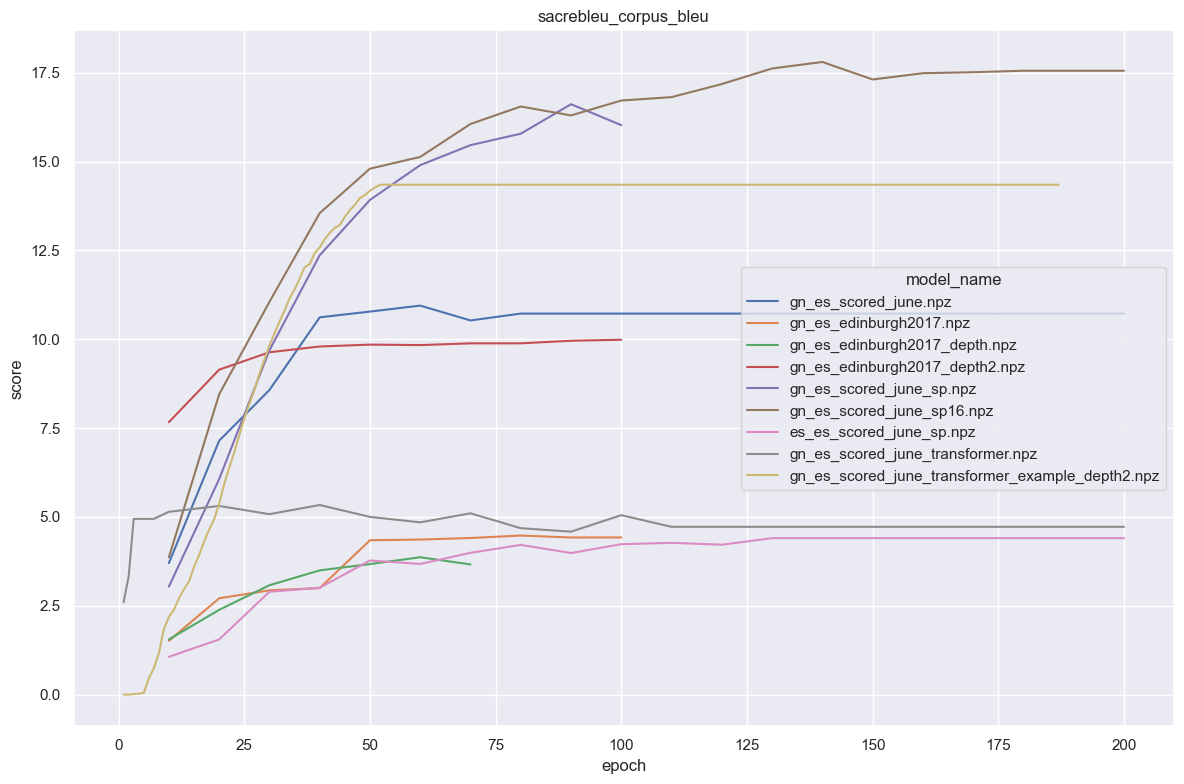

In [20]:
plots.plot_metric_by_epoch_foreach_model(results_df, metric='sacrebleu_corpus_bleu');

In [17]:
# results_df['model_name'].unique()

array(['gn_es_scored_june.npz', 'gn_es_edinburgh2017.npz',
       'gn_es_edinburgh2017_nematus.npz', 'gn_es_edinburgh2017_depth.npz',
       'gn_es_edinburgh2017_depth2.npz', 'gn_es_scored_june_sp.npz',
       'gn_es_scored_june_sp16.npz', 'es_es_scored_june_sp.npz',
       'gn_es_scored_june_transformer.npz',
       'gn_es_scored_june_transformer_example_depth2.npz'], dtype=object)

In [19]:
# models_to_delete = [
#     #'gn_es_edinburgh2017_nematus.npz',
# ]

# results_df = results_df[~results_df['model_name'].isin(models_to_delete)]
# results_df.to_csv(LAST_MODELS_RESULTS, index=False)

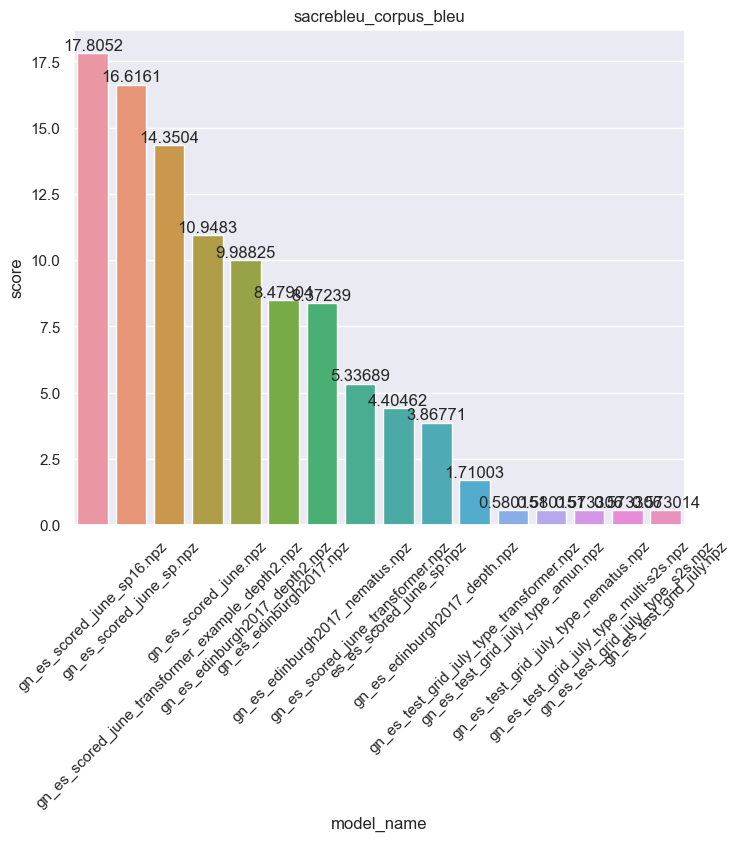

In [10]:
plots.plot_max_score_by_model(results_df, metric='sacrebleu_corpus_bleu');

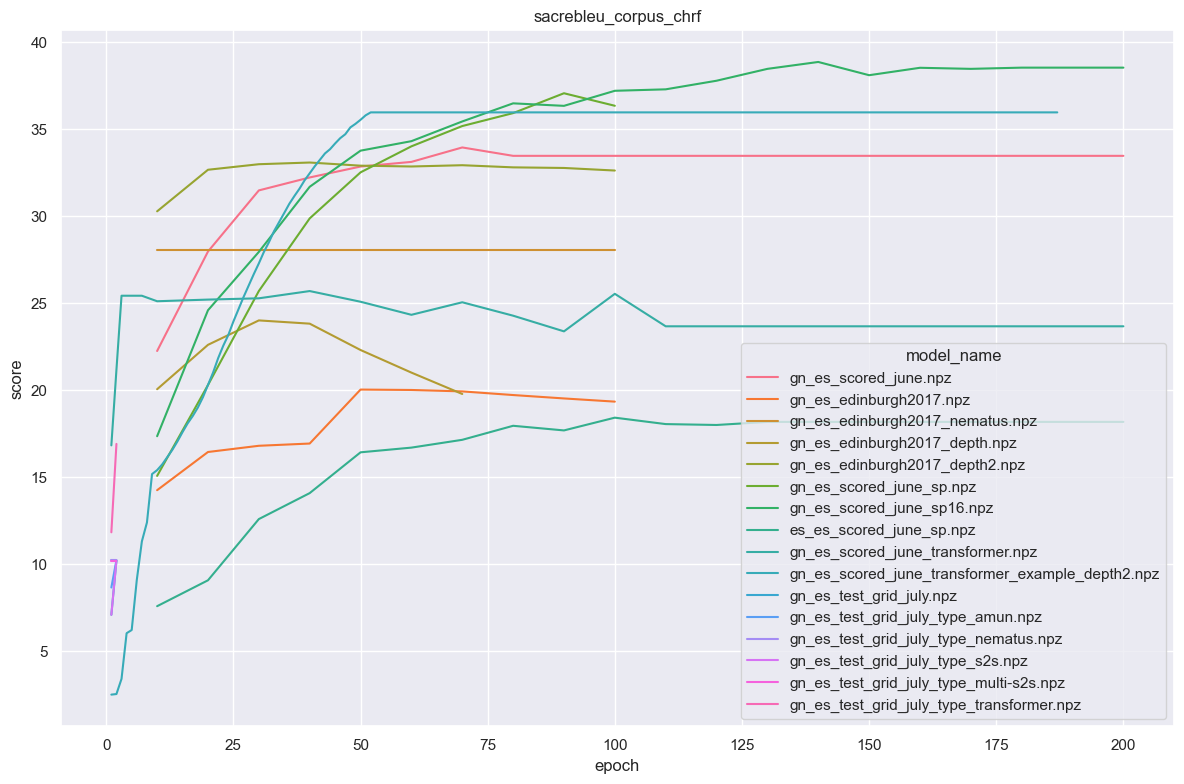

In [11]:
plots.plot_metric_by_epoch_foreach_model(results_df, metric='sacrebleu_corpus_chrf');

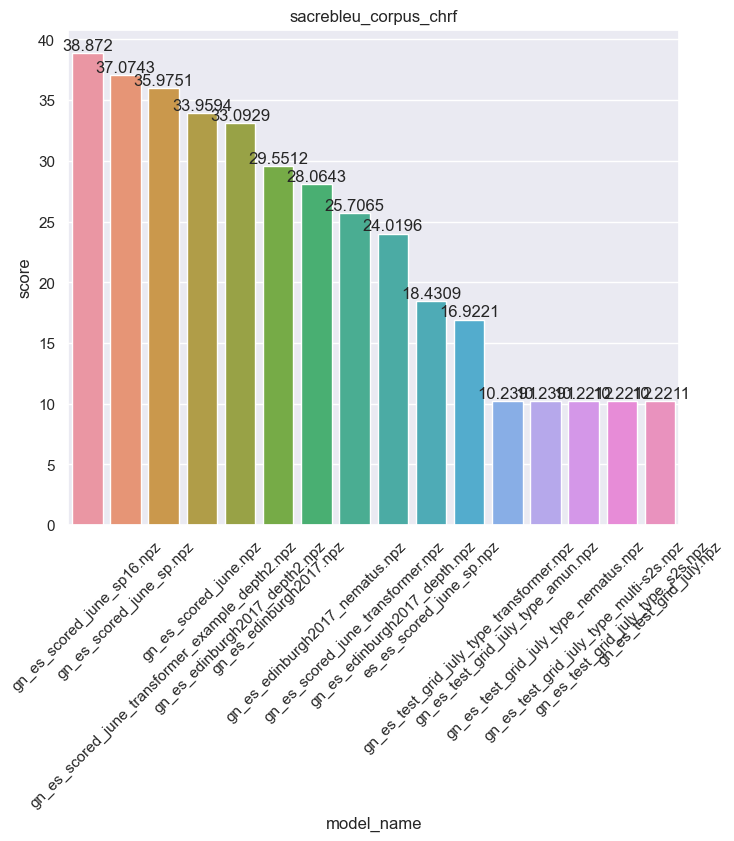

In [12]:
plots.plot_max_score_by_model(results_df, metric='sacrebleu_corpus_chrf');